# Primeira Análise em Python
## Alunos: 
Brenner Santos e Klara Maia
## Matéria: 
Introdução à Ciência de Dados
## Data
Novembro de 2020

# Introdução
  O tema desse projeto é "Uso da Cota para Exercício da Atividade Parlamentar por Deputados Federais", uma assunto muito importante e que em muitos casos apenas é tratado na época de votação eleitoral para esse cargo. Além de sua relevância, o site: "serenata.ai" informa que apenas com essa cota, os reembolsos dos 513 deputados federais em um ano significa o custo de 128 milhões,visto isso, é interessante saber se os dados dos deputados federais representa um padrão sem coincidência em relação essa cota. Para que seja possível chegar a um conclusão a respeito disso, o projeto tem como objetivo responder as seguintes perguntas: 
  
 1. Os mesmos deputados que mais utilizam das cotas são os mais presentes nos eventos? 
 2. O gasto da cota "DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR" possui relação com o ano de eleição?
 3. A quantidade de cotas é proporcional ao valor líquido de cada candidato, ou seja, quanto maior a quantidade de cotas maior o valor líquido?
 4. Os deputados de um mandado(2011-2014) tiveram o mesmo comportamento que os deputados do outro mandato(2015-2018)?
 5. Os candidatos releitos é maior que 513? Ou seja, o comportamento tende a mudar?
 
Observação as perguntas foram modificadas, por conta dos bancos de dados apresentarem algunas problemas, além disso, outra ideia a ser usada era fazer uma regressão dos valores gastos por candidato e a presença de cada um deles nos eventos, entretanto, quanto foi feito isso os tamanhos dos dados apresentarem tamanhos diferentes e foi desconsiderado essa ideia.
 

# Metodologia
## Base de dados
Os dados foram coletados no [Portal Dados Abertos da Câmara dos Deputados](https://dadosabertos.camara.leg.br/swagger/api.html#staticfile), onde contem dados consisos sobre as despesas cobertas pela Cota para Exercício da Atividade Parlamentar de cada deputado, os eventos ocorridos anualmente e quais deputados esteveram presentes nos eventos. Serão utilizados os dados de 2011 a 2018 para a análise, o que representa dois mandatos.

### Limpeza e Transformação dos dados
Como já alertado pelo próprio Portal, esses arquivos não seguem os mesmos padrões de nomenclatura, identificadores e organização. Por compatibilidade, eles mantiveram as características de arquivos anteriormente já publicados pela Câmara. Ademais, tem dados vazios em algumas colunas e é necessário fazer alterações para juntar os dados.
### Métodos
Afim de facilitar a análise e retirar diversas informações foram feitos data frames de cada mandato e em conjunto, unindo eles quando necessário ou/e separando as variáveis de interesse.
Foi realizado nesse trabalho análise exploratória, teste de hipótese, regressão e classificação.

#### Primeira base de dados
Na base de dados "Despesas cobertas pela Cota para Exercício da Atividade Parlamentar de cada deputado" foi  adicionado uma coluna com o respectivo ano para que seja possível juntar os data frames. Dessa forma, foi estabelecido 3 novos data frames:
1. df = Todas as despesas
2. df_1= Despesas do mandato de 2011-2014
2. df_2= Despesas do mandato de 2015-2018

In [1]:
import pandas as pd
df_2011 = pd.read_csv('./Ano-2011.csv', sep=";")
df_2011['ano'] = 2011
df_2012 = pd.read_csv('./Ano-2012.csv', sep=";")
df_2012['ano'] = 2012
df_2013 = pd.read_csv('./Ano-2013.csv', sep=";")
df_2013['ano'] = 2013
df_2014 = pd.read_csv('./Ano-2014.csv', sep=";")
df_2014['ano'] = 2014
df_2015 = pd.read_csv('./Ano-2015.csv', sep=";")
df_2015['ano'] = 2015
df_2016 = pd.read_csv('./Ano-2016.csv', sep=";")
df_2016['ano'] = 2016
df_2017 = pd.read_csv('./Ano-2017.csv', sep=";")
df_2017['ano'] = 2017
df_2018 = pd.read_csv('./Ano-2018.csv', sep=";")
df_2018['ano'] = 2018

In [2]:
df = pd.concat([df_2011,df_2012,df_2013,df_2014,df_2015,df_2016,df_2017,df_2018])
df.head()

,txNomeParlamentar,cpf,ideCadastro,nuCarteiraParlamentar,nuLegislatura,sgUF,sgPartido,codLegislatura,numSubCota,txtDescricao,...,numParcela,txtPassageiro,txtTrecho,numLote,numRessarcimento,vlrRestituicao,nuDeputadoId,ideDocumento,urlDocumento,ano
0,LIDERANÇA DO PSDB,NaN,NaN,NaN,2011,NaN,NaN,54,1,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,...,0,NaN,NaN,588705,NaN,NaN,2442,2246504,NaN,2011
1,LIDERANÇA DO PSDB,NaN,NaN,NaN,2011,NaN,NaN,54,1,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,...,0,NaN,NaN,588705,NaN,NaN,2442,2246505,NaN,2011
2,LIDERANÇA DO PSDB,NaN,NaN,NaN,2011,NaN,NaN,54,1,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,...,0,NaN,NaN,568174,NaN,NaN,2442,2181555,NaN,2011
3,LIDERANÇA DO PSDB,NaN,NaN,NaN,2011,NaN,NaN,54,1,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,...,0,NaN,NaN,574051,NaN,NaN,2442,2193013,NaN,2011
4,LIDERANÇA DO PSDB,NaN,NaN,NaN,2011,NaN,NaN,54,3,COMBUSTÍVEIS E LUBRIFICANTES.,...,0,NaN,NaN,561555,NaN,NaN,2442,2150852,NaN,2011


In [3]:
df_1 = pd.concat([df_2011,df_2012,df_2013,df_2014])
df_2 = pd.concat([df_2015,df_2016,df_2017,df_2018])

As variáveis de cada data frame são:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2937734 entries, 0 to 292606
Data columns (total 32 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   txNomeParlamentar          object 
 1   cpf                        float64
 2   ideCadastro                float64
 3   nuCarteiraParlamentar      float64
 4   nuLegislatura              int64  
 5   sgUF                       object 
 6   sgPartido                  object 
 7   codLegislatura             int64  
 8   numSubCota                 int64  
 9   txtDescricao               object 
 10  numEspecificacaoSubCota    int64  
 11  txtDescricaoEspecificacao  object 
 12  txtFornecedor              object 
 13  txtCNPJCPF                 object 
 14  txtNumero                  object 
 15  indTipoDocumento           int64  
 16  datEmissao                 object 
 17  vlrDocumento               float64
 18  vlrGlosa                   float64
 19  vlrLiquido                 float64
 20  num

#### Segunda base de dados
Na base de dados "Eventos por ano que aconteceram com a descrição do evento" foi  adicionado uma coluna com o respectivo ano para que seja possível juntar os data frames. Desse modo, foi estabelecido 3 novos data frames:
1. df_eventos = Todos os eventos
2. df_eventos_1= Eventos do mandato de 2011-2014
2. df_eventos_2= Eventos do mandato de 2015-2018

In [5]:
df_11 = pd.read_csv('./eventos-2011.csv', sep=";")
df_11['ano'] = 2011
df_12 = pd.read_csv('./eventos-2012.csv', sep=";")
df_12['ano'] = 2012
df_13 = pd.read_csv('./eventos-2013.csv', sep=";")
df_13['ano'] = 2013
df_14 = pd.read_csv('./eventos-2014.csv', sep=";")
df_14['ano'] = 2014
df_15 = pd.read_csv('./eventos-2015.csv', sep=";")
df_15['ano'] = 2015
df_16 = pd.read_csv('./eventos-2016.csv', sep=";")
df_16['ano'] = 2016
df_17 = pd.read_csv('./eventos-2017.csv', sep=";")
df_17['ano'] = 2017
df_18 = pd.read_csv('./eventos-2018.csv', sep=";")
df_18['ano'] = 2018

In [6]:
df_eventos = pd.concat([df_11,df_12,df_13,df_14,df_15,df_16,df_17,df_18])
df_eventos.head()

,id,uri,urlDocumentoPauta,dataHoraInicio,dataHoraFim,situacao,descricao,descricaoTipo,localExterno,localCamara.nome,localCamara.predio,localCamara.sala,localCamara.andar,ano
0,28166,https://dadosabertos.camara.leg.br/api/v2/even...,https://www.camara.gov.br/internet/ordemdodia/...,2011-12-22T17:19:00,2011-12-22T20:36:00,Encerrada,REUNIÃO DELIBERATIVA DA CMO\r\n\r\n1. ABERTURA...,Reunião Deliberativa,NaN,"Anexo II, Plenário 01",NaN,NaN,NaN,2011
1,28163,https://dadosabertos.camara.leg.br/api/v2/even...,https://www.camara.gov.br/internet/ordemdodia/...,2011-12-22T14:00:00,2011-12-22T14:04:00,Encerrada,SESSÃO ORDINÁRIA DE DEBATES E TRABALHO DE COMI...,Trabalho de Comissões,NaN,Plenário da Câmara dos Deputados,NaN,NaN,NaN,2011
2,28165,https://dadosabertos.camara.leg.br/api/v2/even...,https://www.camara.gov.br/internet/ordemdodia/...,2011-12-22T13:47:00,2011-12-22T15:32:00,Encerrada (Final),REUNIÃO DELIBERATIVA DA CMO\r\n\r\n1. ABERTURA...,Reunião Deliberativa,NaN,"Anexo II, Plenário 01",NaN,NaN,NaN,2011
3,28164,https://dadosabertos.camara.leg.br/api/v2/even...,https://www.camara.gov.br/internet/ordemdodia/...,2011-12-22T10:02:00,2011-12-22T13:20:00,Encerrada,REUNIÃO DELIBERATIVA DA CMO\r\n\r\n1. ABERTURA...,Reunião Deliberativa,NaN,"Anexo II, Plenário 02",NaN,NaN,NaN,2011
4,28148,https://dadosabertos.camara.leg.br/api/v2/even...,https://www.camara.gov.br/internet/ordemdodia/...,2011-12-21T19:59:00,2011-12-21T20:01:00,Encerrada,REUNIÃO DELIBERATIVA DA CMO\r\n\r\n1. ABERTURA...,Reunião Deliberativa,NaN,"Anexo II, Plenário 02",NaN,NaN,NaN,2011


In [7]:
df_eventos_1 = pd.concat([df_11,df_12,df_13,df_14])
df_eventos_2 = pd.concat([df_15,df_16,df_17,df_18])

As variaveis de cada data frame são:

In [8]:
df_eventos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22572 entries, 0 to 2210
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  22572 non-null  int64  
 1   uri                 22572 non-null  object 
 2   urlDocumentoPauta   21688 non-null  object 
 3   dataHoraInicio      22572 non-null  object 
 4   dataHoraFim         17553 non-null  object 
 5   situacao            22572 non-null  object 
 6   descricao           22572 non-null  object 
 7   descricaoTipo       22572 non-null  object 
 8   localExterno        2433 non-null   object 
 9   localCamara.nome    20138 non-null  object 
 10  localCamara.predio  0 non-null      float64
 11  localCamara.sala    0 non-null      float64
 12  localCamara.andar   0 non-null      float64
 13  ano                 22572 non-null  int64  
dtypes: float64(3), int64(2), object(9)
memory usage: 2.6+ MB


#### Terceira base de dados
Na base de dados "Eventos por ano que cada candidato esteve presente" foi  adicionado uma coluna com o respectivo ano para que seja possível juntar os data frames. Dessa maneira, foi estabelecido 3 novos data frames:
1. df_eventos_presentes = Todos os eventos com os candidatos presentes
2. df_eventos_presentes_1= Eventos com os candidatos presentes do mandato de 2011-2014
2. df_eventos_presentes_2= Eventos com os candidatos presentes do mandato de 2015-2018

In [9]:
df_01 = pd.read_csv('./eventosPresencaDeputados-2011.csv', sep=";")
df_01['ano'] = 2011
df_02 = pd.read_csv('./eventosPresencaDeputados-2012.csv', sep=";")
df_02['ano'] = 2012
df_3 = pd.read_csv('./eventosPresencaDeputados-2013.csv', sep=";")
df_3['ano'] = 2013
df_4 = pd.read_csv('./eventosPresencaDeputados-2014.csv', sep=";")
df_4['ano'] = 2014
df_5 = pd.read_csv('./eventosPresencaDeputados-2015.csv', sep=";")
df_5['ano'] = 2015
df_6 = pd.read_csv('./eventosPresencaDeputados-2016.csv', sep=";")
df_6['ano'] = 2016
df_7 = pd.read_csv('./eventosPresencaDeputados-2017.csv', sep=";")
df_7['ano'] = 2017
df_8 = pd.read_csv('./eventosPresencaDeputados-2018.csv', sep=";")
df_8['ano'] = 2018

In [10]:
df_eventos_presentes = pd.concat([df_01,df_02,df_3,df_4,df_5,df_6,df_7,df_8])
df_eventos_presentes.head()

,idEvento,uriEvento,dataHoraInicio,idDeputado,uriDeputado,ano
0,22450,https://dadosabertos.camara.leg.br/api/v2/even...,2011-10-25T14:30:00,73459,https://dadosabertos.camara.leg.br/api/v2/depu...,2011
1,22450,https://dadosabertos.camara.leg.br/api/v2/even...,2011-10-25T14:30:00,74027,https://dadosabertos.camara.leg.br/api/v2/depu...,2011
2,22450,https://dadosabertos.camara.leg.br/api/v2/even...,2011-10-25T14:30:00,74400,https://dadosabertos.camara.leg.br/api/v2/depu...,2011
3,22450,https://dadosabertos.camara.leg.br/api/v2/even...,2011-10-25T14:30:00,141453,https://dadosabertos.camara.leg.br/api/v2/depu...,2011
4,22450,https://dadosabertos.camara.leg.br/api/v2/even...,2011-10-25T14:30:00,141456,https://dadosabertos.camara.leg.br/api/v2/depu...,2011


In [11]:
df_eventos_presentes_1 = pd.concat([df_01,df_02,df_3,df_4])
df_eventos_presentes_2 = pd.concat([df_5,df_6,df_7,df_8])

As variaveis de cada data frame são:

In [12]:
df_eventos_presentes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 936894 entries, 0 to 82654
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   idEvento        936894 non-null  int64 
 1   uriEvento       936894 non-null  object
 2   dataHoraInicio  936894 non-null  object
 3   idDeputado      936894 non-null  int64 
 4   uriDeputado     936894 non-null  object
 5   ano             936894 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 50.0+ MB


# Resultados
## Análise Exploratória

In [13]:
print("Visualização geral por ano do primeiro banco de dados")
df.groupby([df['ano'], 'nuDeputadoId']).count()

Visualização geral por ano do primeiro banco de dados


txNomeParlamentar  cpf  ideCadastro  nuCarteiraParlamentar  \
ano  nuDeputadoId                                                               
2011 12                           29   25           29                     29   
     47                          165  165          165                    165   
     59                          140  140          140                    140   
     67                           37   37           37                     37   
     74                           12   12           12                     12   
...                              ...  ...          ...                    ...   
2018 3184                        102  102          102                    102   
     3185                         75   75           75                     75   
     3186                         30   30           30                     30   
     3187                         40   40           40                     40   
     3188                         14   14           14                     14   

                   nuLegislatura  sgUF  sgPartido  codLegislatura  numSubCota  \
ano  nuDeputadoId                                                               
2011 12                       29    29         29              29          29   
     47                      165   165        165             165         165   
     59                      140   140        140             140         140   
     67                       37    37         37              37          37   
     74                       12    12         12              12          12   
...                          ...   ...        ...             ...         ...   
2018 3184                    102   102        102             102         102   
     3185                     75    75         75              75          75   
     3186                     30    30         30              30          30   
     3187                     40    40         40              40          40   
     3188                     14    14         14              14          14   

                   txtDescricao  ...  numMes  numAno  numParcela  \
ano  nuDeputadoId                ...                               
2011 12                      29  ...      29      29          29   
     47                     165  ...     165     165         165   
     59                     140  ...     140     140         140   
     67                      37  ...      37      37          37   
     74                      12  ...      12      12          12   
...                         ...  ...     ...     ...         ...   
2018 3184                   102  ...     102     102         102   
     3185                    75  ...      75      75          75   
     3186                    30  ...      30      30          30   
     3187                    40  ...      40      40          40   
     3188                    14  ...      14      14          14   

                   txtPassageiro  txtTrecho  numLote  numRessarcimento  \
ano  nuDeputadoId                                                        
2011 12                        4          4       29                22   
     47                       90         90      165               153   
     59                       63         63      140               110   
     67                        1          1       37                13   
     74                        1          1       12                10   
...                          ...        ...      ...               ...   
2018 3184                     44         42      102                62   
     3185                      3          3       75                 8   
     3186                     13         13       30                23   
     3187                     21         21       40                30   
     3188                      1          1       14                 2   

                   vlrRestituicao  ideDocumento  urlDocumento  

### Cotas por candidato
Segue abaixo dois gráficos comparando os 10 deputados de cada mandato que mais utilizaram das cotas, em relação a quantidade de uso, não valor gasto.

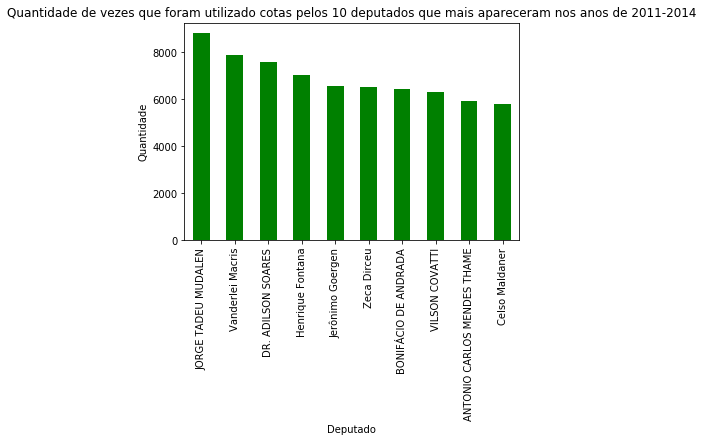

In [14]:
from matplotlib import pyplot as plt
df_1.txNomeParlamentar.value_counts().head(n=10).plot.bar(title="Quantidade de vezes que foram utilizado cotas pelos 10 deputados que mais apareceram nos anos de 2011-2014",color='g')
plt.xlabel('Deputado')
plt.ylabel('Quantidade')
plt.show()

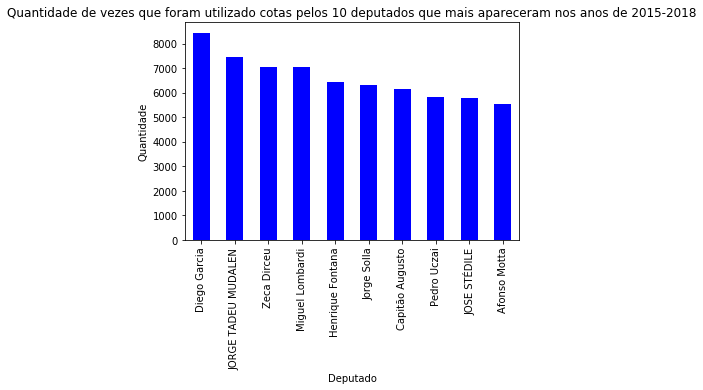

In [15]:
df_2.txNomeParlamentar.value_counts().head(n=10).plot.bar(title="Quantidade de vezes que foram utilizado cotas pelos 10 deputados que mais apareceram nos anos de 2015-2018",color='b')
plt.xlabel('Deputado')
plt.ylabel('Quantidade')
plt.show()

In [16]:
print('média do uso das cotas de 2011-2014 por candidato:',df_1.nuDeputadoId.mean())
print('média do uso das cotas de 2015-2018 por candidato:',df_2.nuDeputadoId.mean())

média do uso das cotas de 2011-2014 por candidato: 1794.8551810463316
média do uso das cotas de 2015-2018 por candidato: 2220.5501571200216


#### Comparando o uso de cotas por candidato de cada mandato
Comparando os dois mandatos percebe que alguns deputados que foram releitos esteve presente no ranking dos 10 que mais utilizaram as cotas, Jorge Tadeu Mudalen, Zeca Dirceu e Henrique Fontana. Além disso, ambos os gráficos aparentam ter valores similares se comparado a cada colocação, entretanto a média do uso das cotas por candidato aumentou bastante de um mandato para outro.

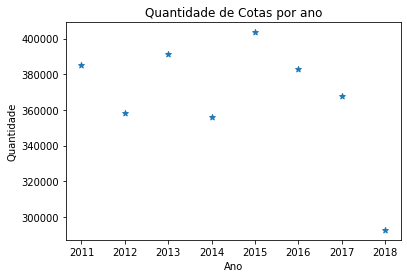

In [17]:
a = df.ano.value_counts()
a
plt.scatter(['2011', '2012', '2013','2014', '2015', '2016','2017', '2018'],[385169,358343,391167,356072,403600,383062,367714,292607], marker = '*')
plt.title('Quantidade de Cotas por ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.show()



#### Comentário sobre o gráfico
É interesante ressaltar que esperavamos uma constância na quantidade de uso de cotas por ano, apenas mudanças relativamente baixas o que não foi o caso. Ademais, o fim do mandato teve os menores valores e o início dos mandatos teve valores mais elevados.

### Quais cotas foram mais utilizadas

In [18]:
print("As 10 cotas que mais foram utilizadas de 2011-2014")
df_1.txtDescricao.value_counts().head(n=10)

As 10 cotas que mais foram utilizadas de 2011-2014


PASSAGEM AÉREA - RPA                                            381286
COMBUSTÍVEIS E LUBRIFICANTES.                                   285054
TELEFONIA                                                       279751
SERVIÇOS POSTAIS                                                159697
FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR                      101244
LOCAÇÃO DE VEÍCULOS AUTOMOTORES OU FRETAMENTO DE EMBARCAÇÕES     96481
MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE PARLAMENTAR        81810
DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.                             32119
HOSPEDAGEM ,EXCETO DO PARLAMENTAR NO DISTRITO FEDERAL.           22882
SERVIÇO DE TÁXI, PEDÁGIO E ESTACIONAMENTO                        19741
Name: txtDescricao, dtype: int64

In [19]:
print("As 10 cotas que mais foram utilizadas de 2015-2018")
df_2.txtDescricao.value_counts().head(n=10)

As 10 cotas que mais foram utilizadas de 2015-2018


PASSAGEM AÉREA - RPA                                         432471
COMBUSTÍVEIS E LUBRIFICANTES.                                279715
TELEFONIA                                                    211606
SERVIÇO DE TÁXI, PEDÁGIO E ESTACIONAMENTO                    107093
SERVIÇOS POSTAIS                                             104645
FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR                    94355
MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE PARLAMENTAR     90548
DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.                          42270
HOSPEDAGEM ,EXCETO DO PARLAMENTAR NO DISTRITO FEDERAL.        26212
LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES                 24806
Name: txtDescricao, dtype: int64

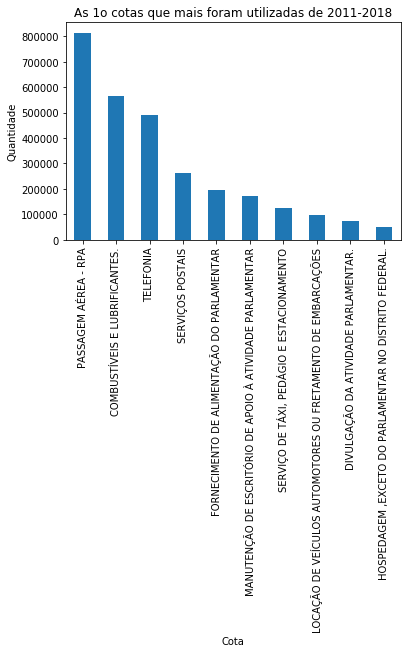

In [20]:
df.txtDescricao.value_counts().head(n=10).plot.bar()
plt.title('As 1o cotas que mais foram utilizadas de 2011-2018')
plt.xlabel('Cota')
plt.ylabel('Quantidade')
plt.show()

In [21]:
print('média do uso das cotas de 2011-2014 por cota:',df_1.txtDescricao.value_counts().mean())
print('média do uso das cotas de 2015-2018 por cota:',df_2.txtDescricao.value_counts().mean())

média do uso das cotas de 2011-2014 por cota: 82819.5
média do uso das cotas de 2015-2018 por cota: 80387.94444444444


#### Comentário sobre as cotas
Percebe-se que apesar do número de cotas diminuir em relação a cada cota, a quantidade de cotas por candidato aumenta.

### Quais valores líquidos foram maiores por candidato e cota

In [22]:
print("Os 10 candidatos que tiveram maior valor liquido em relação as cotas nos anos de 2011-2014")
df_1.groupby(['txNomeParlamentar'])['vlrLiquido'].sum().sort_values(ascending=False).head(10)

Os 10 candidatos que tiveram maior valor liquido em relação as cotas nos anos de 2011-2014


txNomeParlamentar
CHICO DAS VERDURAS       2182762.62
Edio Lopes               1768300.45
Jhonatan de Jesus        1753412.87
MOREIRA MENDES           1734656.09
Perpétua Almeida         1733755.53
PAULO CESAR QUARTIERO    1729754.91
Silas Câmara             1720887.84
RAUL LIMA                1707777.32
EVANDRO MILHOMEN         1705871.91
GLADSON CAMELI           1693969.00
Name: vlrLiquido, dtype: float64

In [23]:
print("Os 10 candidatos que tiveram maior valor liquido em relação as cotas nos anos de 2015-2018")
df_2.groupby(['txNomeParlamentar'])['vlrLiquido'].sum().sort_values(ascending=False).head(10)

Os 10 candidatos que tiveram maior valor liquido em relação as cotas nos anos de 2015-2018


txNomeParlamentar
Jhonatan de Jesus    2199968.55
Edio Lopes           2167492.52
REMÍDIO MONAI        2156400.21
Hiran Gonçalves      2124162.39
CARLOS ANDRADE       2110581.37
Vinicius Gurgel      2101224.81
Jéssica Sales        2093041.48
ABEL MESQUITA JR.    2093033.49
MARIA HELENA         2091810.27
Silas Câmara         2084327.59
Name: vlrLiquido, dtype: float64

In [24]:
print("As 10 cotas que tiveram maior valor liquido em relação as cotas nos anos de 2011-2014")
df_1.groupby(['txtDescricao'])['vlrLiquido'].sum().sort_values(ascending=False).head(10)

As 10 cotas que tiveram maior valor liquido em relação as cotas nos anos de 2011-2014


txtDescricao
PASSAGEM AÉREA - RPA                                            1.527233e+08
DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.                            1.462726e+08
TELEFONIA                                                       8.204898e+07
MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE PARLAMENTAR       7.084625e+07
LOCAÇÃO DE VEÍCULOS AUTOMOTORES OU FRETAMENTO DE EMBARCAÇÕES    6.554799e+07
CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.                   6.455829e+07
COMBUSTÍVEIS E LUBRIFICANTES.                                   6.406450e+07
SERVIÇOS POSTAIS                                                2.123285e+07
LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES                   1.826947e+07
PASSAGEM AÉREA - REEMBOLSO                                      1.569291e+07
Name: vlrLiquido, dtype: float64

In [25]:
print("As 10 cotas que tiveram maior valor liquido em relação as cotas nos anos de 2015-2018")
df_2.groupby(['txtDescricao'])['vlrLiquido'].sum().sort_values(ascending=False).head(10)

As 10 cotas que tiveram maior valor liquido em relação as cotas nos anos de 2015-2018


txtDescricao
DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.                         2.102360e+08
PASSAGEM AÉREA - RPA                                         2.031599e+08
LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES                1.058582e+08
MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE PARLAMENTAR    9.385328e+07
CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.                8.607327e+07
COMBUSTÍVEIS E LUBRIFICANTES.                                7.236589e+07
TELEFONIA                                                    4.235332e+07
SERVIÇOS POSTAIS                                             1.445950e+07
LOCAÇÃO OU FRETAMENTO DE AERONAVES                           1.150736e+07
PASSAGEM AÉREA - REEMBOLSO                                   1.015588e+07
Name: vlrLiquido, dtype: float64

##### Comentário sobre o valor líquido
Em relação aos 10 candidatos com maior valor líquido das cotas, dois foram releitos e permaneceram nas posições altas, foram eles, Edio Lopes e Jhonatan de Jesus. Se comparado com o gráfico de quantidade de cotas, os deputados são diferentes, dessa forma, não se pode afirmar que quanto mais cotas utilizadas maior foi gasto. 
Outro ponto que foi percebido é que nas 10 cotas, a Divulgação da Atividade Parlamentar ocupava posições mais baixas em relação a quantidade usada, mas em valor líquido ocupa os primeiro lugares. Além disso, passagem área-RPA continua nas posições altas em ambas as variáveis.

### Eventos

In [26]:
print("Os 10 eventos que mais ocorreram nos anos de 2011-2018")
df_eventos.descricaoTipo.value_counts().head(n=10)

Os 10 eventos que mais ocorreram nos anos de 2011-2018


Reunião Deliberativa                  10007
Audiência Pública                      4849
Sessão Deliberativa                    1611
Outro Evento                           1219
Seminário                               908
Sessão Não Deliberativa de Debates      826
Reunião de Instalação e Eleição         768
Sessão Não Deliberativa Solene          627
Reunião                                 365
Mesa Redonda                            248
Name: descricaoTipo, dtype: int64

In [27]:
print("Os 10 eventos que mais ocorreram nos anos de 2011-2014")
df_eventos_1.descricaoTipo.value_counts().head(n=10)

Os 10 eventos que mais ocorreram nos anos de 2011-2014


Reunião Deliberativa                  4635
Audiência Pública                     2195
Sessão Deliberativa                    730
Outro Evento                           606
Seminário                              375
Reunião de Instalação e Eleição        323
Sessão Não Deliberativa de Debates     312
Sessão Não Deliberativa Solene         190
Sessão de Debates                      160
Sessão Solene                          137
Name: descricaoTipo, dtype: int64

In [28]:
print("Os 10 eventos que mais ocorreram nos anos de 2015-2018")
df_eventos_2.descricaoTipo.value_counts().head(n=10)

Os 10 eventos que mais ocorreram nos anos de 2015-2018


Reunião Deliberativa                  5372
Audiência Pública                     2654
Sessão Deliberativa                    881
Outro Evento                           613
Seminário                              533
Sessão Não Deliberativa de Debates     514
Reunião de Instalação e Eleição        445
Sessão Não Deliberativa Solene         437
Reunião                                281
Reunião Técnica                        130
Name: descricaoTipo, dtype: int64

In [29]:
print('média dos eventos de 2011-2014 que cada tipo de evento teve:',df_eventos_1.descricaoTipo.value_counts().mean())
print('média dos eventos de 2015-2018 que cada tipo de evento teve:',df_eventos_2.descricaoTipo.value_counts().mean())

média dos eventos de 2011-2014 que cada tipo de evento teve: 426.625
média dos eventos de 2015-2018 que cada tipo de evento teve: 513.875


#### Comentário
Uma descrição dos eventos que mais ocorreram em cada mandato e a média de quantos ocorrem por tipo de evento. Já se esperava as primeiras colocações, mas a média surpreendeu.

In [30]:
print("Os 10 eventos que mais teve candidatos presentes de 2011-2014, independente da frequência de ocorrência de eventos")
df_eventos_presentes_1.idDeputado.value_counts().head(n=10)

Os 10 eventos que mais teve candidatos presentes de 2011-2014, independente da frequência de ocorrência de eventos


74041     1424
4931      1423
73434     1415
160614    1397
160649    1364
160642    1332
160575    1311
74216     1292
141450    1268
160639    1258
Name: idDeputado, dtype: int64

In [31]:
print("Os 10 eventos que mais teve candidatos presentes de 2015-2018, independente da frequência de ocorrência de eventos")
df_eventos_presentes_2.idDeputado.value_counts().head(n=10)

Os 10 eventos que mais teve candidatos presentes de 2015-2018, independente da frequência de ocorrência de eventos


178993    6377
178871    5255
160518    3975
178898    2929
178893    2918
178998    2645
74585     2642
148134    2341
178884    2060
4931      1982
Name: idDeputado, dtype: int64

In [32]:
print('média dos eventos de 2011-2014 que cada candidato esteve presente:',df_eventos_presentes_1.idDeputado.value_counts().mean())
print('média dos eventos de 2015-2018 que cada candidato esteve presente:',df_eventos_presentes_2.idDeputado.value_counts().mean())

média dos eventos de 2011-2014 que cada candidato esteve presente: 623.7164869029276
média dos eventos de 2015-2018 que cada candidato esteve presente: 851.3632


#### Comentário sobre os eventos
A média de cada tipo de evento aumentou no segundo mandato e a média do número de candidatos presentes também. Apesar da frequência de deputados releitos presentes nas 10 primeiras colocações de gastos nas outras tabelas e gráficos, a quantidade de deputados releitos presentes nos eventos por ano só foi um, Izalci Lucas.

## Teste de Hipótese
H0: No último ano o gasto em valor líquido em "DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR" é igual ao segundo ano

H1:  No último ano o gasto em valor líquido em "DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR" não é igual ao segundo ano

In [33]:
th_01 = df_2012.loc[df_2012['numSubCota']==5]
th_1 = th_01.groupby(['txNomeParlamentar'])['vlrLiquido'].sum()
th_02 = df_2014.loc[df_2014['numSubCota']==5]
th_2 = th_02.groupby(['txNomeParlamentar'])['vlrLiquido'].sum()

Considerando que n é grande será feito o Intervalo de Confiança com a Distribuição Normal com 95 de confiança:

In [34]:
import numpy as np
def calcula_IC(df):
    n=len(df)
    x=np.mean(df)
    p=np.std(df)/n
    inferior = x - 1.96*p
    superior = x + 1.96*p
    return [ inferior, superior ]

In [35]:
print("IC(95%) 2012: ",calcula_IC(th_1))
print("IC(95%) 2014: ",calcula_IC(th_2))

IC(95%) 2012:  [59880.59389255508, 60265.21584587549]
IC(95%) 2014:  [93466.8181048173, 94009.76075792775]


In [36]:
th_03 = df_2016.loc[df_2016['numSubCota']==5]
th_3 = th_03.groupby(['txNomeParlamentar'])['vlrLiquido'].sum()
th_04 = df_2018.loc[df_2018['numSubCota']==5]
th_4 = th_04.groupby(['txNomeParlamentar'])['vlrLiquido'].sum()
print("IC(95%) 2016: ", calcula_IC(th_3))
print("IC(95%) 2018: ",calcula_IC(th_4))

IC(95%) 2016:  [96096.6704490011, 96634.29695557902]
IC(95%) 2018:  [99829.438593489, 100382.64890651108]


Considerando que o intervalo contem 95% de probabildiade de o valor estar presente, percebe que nesses dois intervalos de confiança não existe uma interceção entre os valores, ou seja, os valores de último ano de mandato(ano de eleição) tem mais chance de ser maiores do que no meio do mandadato. Se comparado com o mandato de 2011-2014 a diferença entre os anos é bem maior que do mandato de 2015-2018.

## Conclusão

O uso de diversas bases foi muito interesse para conseguir complementar as nossas dúvidas, por exemplo, algumas descrições apareciam apenas em um dos data frames. Além disso, comparar dois mandatos foi muito interessante, e o fato dos deputados poderem ser releitos sucessivas vezes evitou interpretações equivocadas.

Infelizmente, não foi possível realizar todas as ideias planejadas, mas por isso, foi descoberto várias curiosidades sobre os deputados federais, eventos e a quantidade de dados sobre o assunto. 

Em relação as perguntas:
 1. Foi feito vários ranking dos 10 primeiros deputados que mais utilizam cota, tem maiores valores liquidos totais em relação a cota e que estão presente em mais eventos. A conclusão foi que a quantidade de candidatos releitos nos primeiros lugares foi menor nos presentes em eventos do que no uso de cotas em geral. 
 2. O uso da cota "DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR" teve valores mais altos no ano de eleição do que no meio do ano, entretanto, o ano de 2017 teve um destaque, acredita-se que como 2016 teve o Impeachment de Dilma Rousseff isso pode ter interferido nos resultados.
 3. Foi feito uma regressão linear para a quantidade de cotas e valor líquido de cada candidato,mas não teve uma relação. Dessa forma, não podemos afirmar uma proporção positiva nem negativa.
 4. Os deputados de um mandado(2011-2014) e deputados do outro mandato(2015-2018) tiveram comportamentos similiares em várias situações, em algumas os valores do segundo mandato foram maiores.
 5. Uma das nossas motivações para o trabalho, que foi a informação do site: "serenata.ai" abordando que apenas com essa cota, os reembolsos dos 513 deputados federais em um ano significa o custo de 128 milhões, motivou a curiosidade para saber quantos candidatos seriam releitos afim dos comportamentos poderem ser modificados por pessoas diferentes, mas houve 569 deputados releitos.